In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
from tqdm.auto import tqdm
import gc
from glob import glob
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

In [21]:
from codebench import *

In [56]:
def eval_semester(semester):
    all_data = []
    labels = []
    for klass in classes(semester):
        first_assessment = first_assessment_for_class(klass)
        if first_assessment is None:
            continue
        
        def inner(user):
            #logs = []
            #for assessment in assessments(klass):
            #    logs.append(logs_for_user(user, assessment))
            logs = logs_for_user(user, first_assessment)
            final_grade = parse_final_grade(f'{user}/grades/final_grade.data')
            return (logs, final_grade)
        
        for user in users(klass):
            logs, grade = inner(user)
            all_data.append(logs)
            labels.append(grade)
            
    return all_data, labels

In [57]:
semester_data = Parallel(n_jobs=10)(
    delayed(eval_semester)(semester) for semester in semesters(r"F:\data\cb_dataset_v1.40.tar\cb_dataset_v1.40")
)

In [58]:
grades = [data[1] for data in semester_data]
grades = pd.DataFrame([f for g in grades for f in g], columns=["semester", "class", "student", "grade"]); grades

,semester,class,student,grade
0,2016-1,102,1088,NaN
1,2016-1,102,1175,NaN
2,2016-1,102,1278,2.59
3,2016-1,102,1279,0.01
4,2016-1,102,1280,0.00
...,...,...,...,...
3293,2021-2,357,6141,0.00
3294,2021-2,357,6178,0.06
3295,2021-2,357,6184,NaN
3296,2021-2,357,6193,0.02


In [59]:
# length 10 (semesters)
logs = pd.concat([klass for sem in semester_data for klass in sem[0]]); logs

,semester,class,student,assignment_excercise,time_to_deadline,event_type
0,2016-1,102,1278,18_1000,99 days 13:28:09.709000,text_insert
1,2016-1,102,1278,18_1000,99 days 13:28:08.458000,text_remove
2,2016-1,102,1278,18_1000,99 days 13:28:08.110000,text_insert
3,2016-1,102,1278,18_1000,99 days 13:27:35.096000,text_insert
4,2016-1,102,1278,18_1000,99 days 13:27:35.043000,text_insert
...,...,...,...,...,...,...
27,2021-2,357,6216,2808_994,26 days 00:08:27.038000,text_insert
28,2021-2,357,6216,2808_994,26 days 00:08:26.894000,text_insert
29,2021-2,357,6216,2808_994,26 days 00:08:26.694000,text_insert
30,2021-2,357,6216,2808_994,26 days 00:08:25.986000,text_insert


<AxesSubplot:>

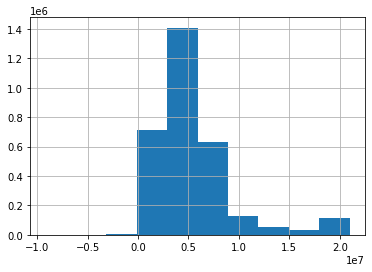

In [55]:
logs.time.astype('timedelta64[s]').hist()

In [60]:
with open('large_dataset.pickle', 'wb') as f:
    pickle.dump({
        "logs": logs,
        "grades": grades
    }, f)

### Time to deadline

In [6]:
klass = classes(semesters(r"F:\data\cb_dataset_v1.40.tar\cb_dataset_v1.40")[0])[0]; klass

'F:\\data\\cb_dataset_v1.40.tar\\cb_dataset_v1.40\\2016-1\\102'

In [7]:
user = users(klass)[0]; user

'F:\\data\\cb_dataset_v1.40.tar\\cb_dataset_v1.40\\2016-1\\102/users\\1088'

In [8]:
glob(user+"/codemirror/*")

['F:\\data\\cb_dataset_v1.40.tar\\cb_dataset_v1.40\\2016-1\\102/users\\1088/codemirror\\106_1100.log']

In [18]:
parse_codemirror(r"F:\\data\\cb_dataset_v1.40.tar\\cb_dataset_v1.40\\2016-1\\102/users\\1088/codemirror\\106_1100.log")

Exception: 2016-07-19 08:00:00

In [16]:
!ls F:\\data\\cb_dataset_v1.40.tar\\cb_dataset_v1.40\\2016-1\\102/users\\1088/codemirror\\106_1100.log/../../../../assessments/

106.data
126.data
136.data
149.data
158.data
173.data
18.data
184.data
199.data
208.data
217.data
44.data
59.data
75.data
97.data
